In [18]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect(r"C:\Users\souvi\Downloads\mental_health.sqlite")
tables = pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)
df = pd.read_sql("SELECT * FROM Answer", conn)

In [33]:
df['answer_length'] = df['AnswerText'].astype(str).str.len()


In [39]:
df['answer_length'].describe()


count    236898.000000
mean          8.546408
std          27.770122
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max        3589.000000
Name: answer_length, dtype: float64

In [41]:
median_length = df['answer_length'].median()
median_length

np.float64(2.0)

In [49]:
long_threshold = df['answer_length'].quantile(0.95)
long_threshold

np.float64(25.0)

In [48]:
short_threshold = df['answer_length'].quantile(0.05)
short_threshold

np.float64(1.0)

In [52]:
df[df['answer_length']<=2]

,AnswerText,SurveyID,UserID,QuestionID,answer_length
0,37,2014,1,1,2
1,44,2014,2,1,2
2,32,2014,3,1,2
3,31,2014,4,1,2
4,31,2014,5,1,2
...,...,...,...,...,...
234954,HR,2016,1690,117,2
235260,HR,2016,1838,117,2
235497,HR,2016,1959,117,2
236190,HR,2016,2314,117,2


In [53]:
df[df['answer_length']<=5]

,AnswerText,SurveyID,UserID,QuestionID,answer_length
0,37,2014,1,1,2
1,44,2014,2,1,2
2,32,2014,3,1,2
3,31,2014,4,1,2
4,31,2014,5,1,2
...,...,...,...,...,...
236863,Other,2016,2673,117,5
236865,HR,2016,2675,117,2
236891,Other,2016,2687,117,5
236893,Other,2016,2689,117,5


In [61]:
threshold_98 = df['answer_length'].quantile(0.98)
threshold_98

np.float64(41.0)

In [62]:
threshold_99 = df['answer_length'].quantile(0.99)
threshold_99

np.float64(87.0)

In [66]:
df.sum()

AnswerText       3744323131333539422331294236272923324636293146...
SurveyID                                                 477721944
UserID                                                   595683958
QuestionID                                                11526485
answer_length                                              2024627
dtype: object

In [92]:
dff = pd.isnull(df['AnswerText']).sum()
dff/len(df)

np.float64(0.0)

In [110]:
df['AnswerText'].value_counts()


AnswerText
-1                                                                                                                                                                                                              56598
No                                                                                                                                                                                                              26899
Yes                                                                                                                                                                                                             18232
1                                                                                                                                                                                                               15308
0                                                                                                                                    

In [114]:
df['answer_length'].describe()


count    236898.000000
mean          8.546408
std          27.770122
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max        3589.000000
Name: answer_length, dtype: float64

C:\Users\souvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


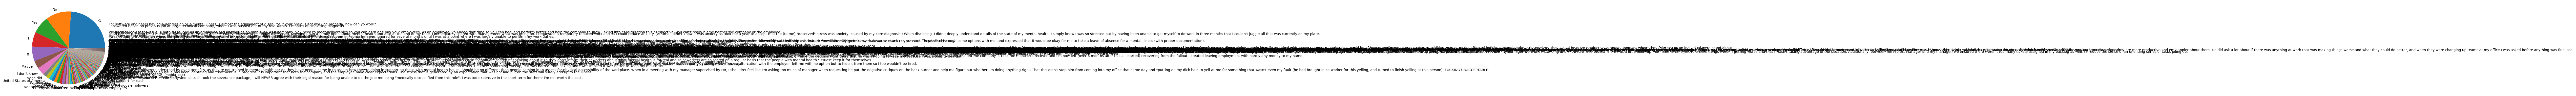

In [120]:
sector = df['AnswerText'].value_counts()
plt.pie(sector,labels=sector.index)
plt.show()

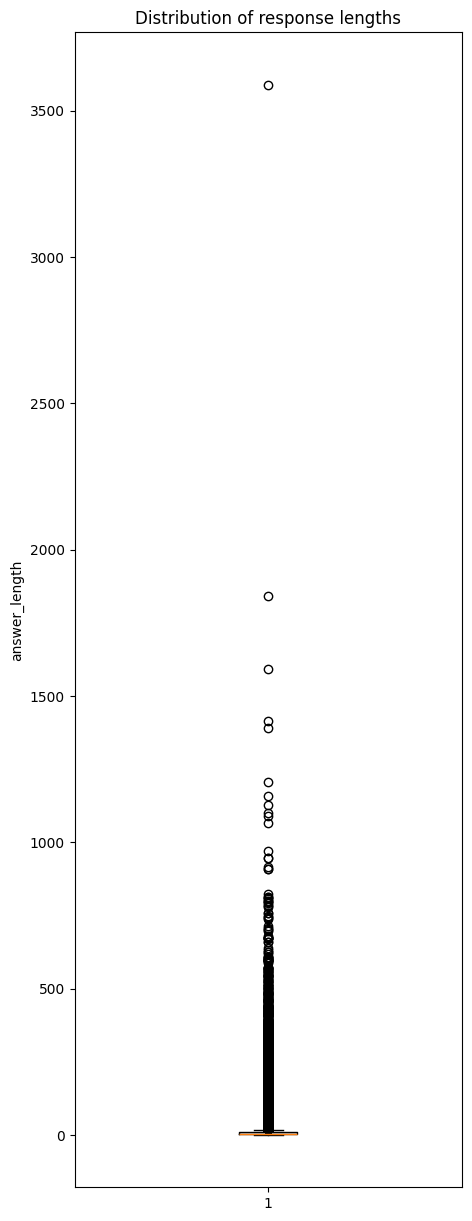

In [132]:
plt.figure(figsize=(5,15))
plt.boxplot(df['answer_length'])
plt.title('Distribution of response lengths')
plt.ylabel('answer_length')
plt.show()

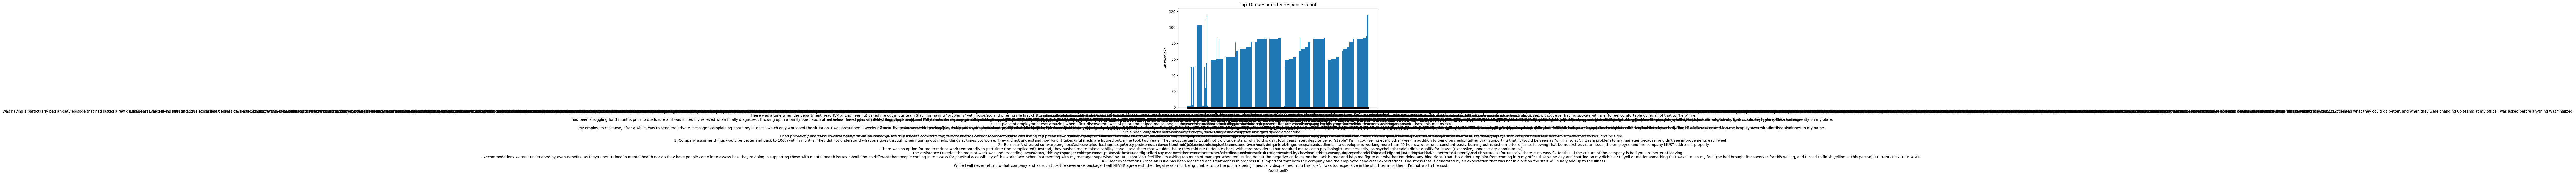

In [146]:
plt.figure(figsize=(10,5))
plt.bar(df['AnswerText'],df['QuestionID'])
plt.title('Top 10 questions by response count')
plt.ylabel('AnswerText')
plt.xlabel('QuestionID')
#plt.xticks(roration=45
plt.show()